In [54]:
import pandas as pd
import numpy as np


In [55]:
diabetes_df = pd.read_csv("diabetes_clean.csv")
print(diabetes_df.columns)

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')


In [56]:
X = diabetes_df.drop('glucose',axis=1).values # Creating np array from the dataframe without the glucose column
y = diabetes_df['glucose'].values # creating np 1d array of the glucose column 
print(X.shape,y.shape)

(768, 8) (768,)


In [57]:
x_bmi = X[:,3] # only taking the bmi as a feature for this model
print(x_bmi.shape)
x_bmi = x_bmi.reshape(-1,1) # as scikit will take 2d arrays as features we reshape the array
print(x_bmi.shape)


(768,)
(768, 1)


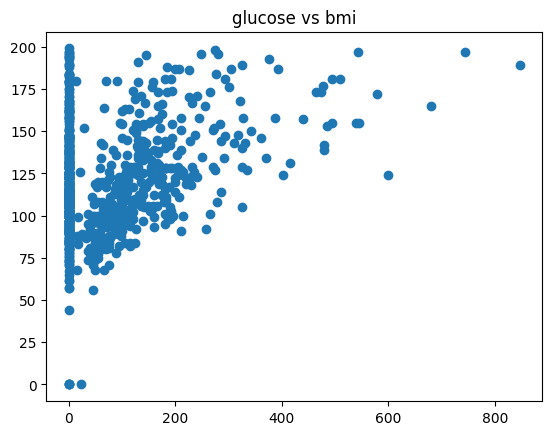

In [58]:
import matplotlib.pyplot as plt 
plt.title('glucose vs bmi')
plt.scatter(x_bmi,y)
plt.show()

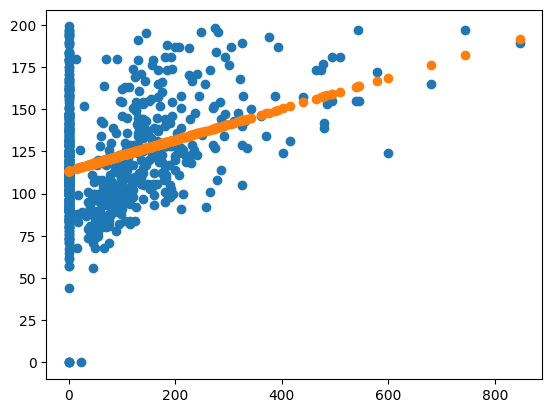

0.10979753429467365


In [59]:
from sklearn.linear_model import LinearRegression  # it is ordinary least square under the hood

line = LinearRegression()
line.fit(x_bmi,y)

prediction = line.predict(x_bmi)
plt.scatter(x_bmi,y)
plt.scatter(x_bmi,prediction)
plt.show()
print(line.score(x_bmi,y)) # To print the R Score of the model. The score is between 0 and 1. 

In [60]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y,prediction,squared=False)
print(error)

30.146692417235155


The R squared value is dependent on the way we split the data. To prevent this and have a more generalized R squared value we use cross validation. Cross validation is a technique to split the data into multiple folds and then train the model on each fold and then average the R squared value or analyze different R squared values. This way we get a more generalized R squared value.

In [61]:
# TO use cross validation
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=6,shuffle=True,random_state=42)

line = LinearRegression()

cv_results = cross_val_score(line,x_bmi,y,cv = kf) #  Returns a np array of R squared values
print(cv_results)


[0.09142175 0.06982383 0.12332834 0.03543375 0.20041294 0.09765311]


Regularization: Is a way to prevent overfitting.
There are two types of regularization in sklearn: Ridge and Lasso.
Ridge: It adds a penalty to the model for each feature that is not important. This way the model will not overfit. The penalty is the sum of square of the coefficient of the feature multiplied by a constant alpha.

Lasso: It adds a penalty to the model for each feature that is not important. This way the model will not overfit. The penalty is the sum of the absolute value of the coefficient of the feature multiplied by a constant alpha.  


In [62]:
# Ridge regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
print(diabetes_df.head())
# Taking bmi as the feature of the linear model to calculate glucose level.

x_bmi = diabetes_df[['diabetes','bmi','diastolic','insulin']].values;
y = diabetes_df['glucose'].values;

x_train, x_test,y_train,y_test = train_test_split(x_bmi,y,test_size=.2,random_state=42)

# taking differecnt alpha values for Ridge model to see its effect on the model

alpha = [.001,.01,1,10,100,1000]
scores_ridge = []

for alpha in alpha:
    rid = Ridge(alpha=alpha)
    rid.fit(x_train,y_train)
    y_pred = rid.predict(x_test)
    scores_ridge.append(rid.score(x_test,y_test))

print('Ridge',scores_ridge)



# taking differecnt alpha values for Ridge model to see its effect on the model

alpha = [.001,.01,1,10,100,1000]
scores_lasso = []

for alpha in alpha:
    las = Lasso(alpha=alpha)
    las.fit(x_train,y_train)
    y_pred = las.predict(x_test)
    scores_lasso.append(las.score(x_test,y_test))

print('Lasso',scores_lasso)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
Ridge [0.3028996206798843, 0.3028995488615406, 0.302881310826413, 0.3019099955549066, 0.26931883435888226, 0.16853468284837503]
Lasso [0.30290056645727925, 0.3029084817633583, 0.2971560801953691, 0.12832752920829937, 0.09433100626817892, 0.036072771460252895]


Lasso can select important features of a dataset
It shrinks the coefficient of less important features to zero.
Features not shrunk to zero are selected by lasso.

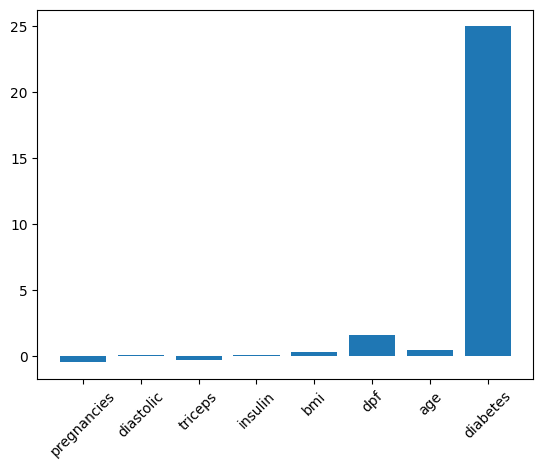

In [64]:
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose'].values
names = diabetes_df.drop('glucose',axis=1).columns
las = Lasso(alpha=.01)

las_coef = las.fit(X,y).coef_

import matplotlib.pyplot as plt

plt.bar(names,las_coef)
plt.xticks(rotation= 45)
plt.show()

# This shows that diabetes feature is the most prominent in the model
